# **Project: Indian Classical Dance Classification & Explainability**



## Phase 1: Rapid Prototyping (3 Epochs)
> *Goal: Verify code stability and compare architectures quickly.*



In [1]:
# ==========================================
# 1. SETUP & REPRODUCIBILITY
# ==========================================
import os, random, kagglehub, numpy as np, pandas as pd, json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16, InceptionV3, vgg16, inception_v3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

SEED = 32
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

In [2]:
# ==========================================
# 2. DATA ACQUISITION (Direct Kaggle)
# ==========================================
path = kagglehub.dataset_download("somnath796/indian-dance-form-recognition")
train_csv = next(os.path.join(root, f) for root, _, files in os.walk(path) for f in files if f == 'train.csv')
image_dir = next(os.path.join(root, d) for root, dirs, _ in os.walk(path) for d in dirs if d == 'train')

df = pd.read_csv(train_csv)
df = df[df['Image'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]


100%|██████████| 26.6M/26.6M [00:00<00:00, 251MB/s]

Extracting files...


In [3]:
# ==========================================
# 3. ROBUST GRAD-CAM FUNCTION
# ==========================================
def get_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # We access the internal layer directly to avoid the 'Sequential' attribute error
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        class_channel = preds[:, tf.argmax(preds[0])]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


--- Processing Simple_CNN ---
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 704ms/step - accuracy: 0.1449 - loss: 21.7170 - val_accuracy: 0.2639 - val_loss: 13.9352
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.3197 - loss: 10.9314 - val_accuracy: 0.1667 - val_loss: 6.7023
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.3825 - loss: 3.1996 - val_accuracy: 0.3333 - val_loss: 2.8675


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)



--- Processing VGG16 ---
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.1768 - loss: 6.7407 - val_accuracy: 0.1389 - val_loss: 4.7979
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.2849 - loss: 4.1833 - val_accuracy: 0.2500 - val_loss: 3.7718
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 506ms/step - accuracy: 0.3545 - loss: 2.9329 - val_accuracy: 0.2639 - val_loss: 3.6229


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_6']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)



--- Processing InceptionV3 ---
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.1510 - loss: 2.2256 - val_accuracy: 0.2361 - val_loss: 1.9406
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.3872 - loss: 1.7440 - val_accuracy: 0.3889 - val_loss: 1.7310
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.5256 - loss: 1.4896 - val_accuracy: 0.4583 - val_loss: 1.6075


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_27']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


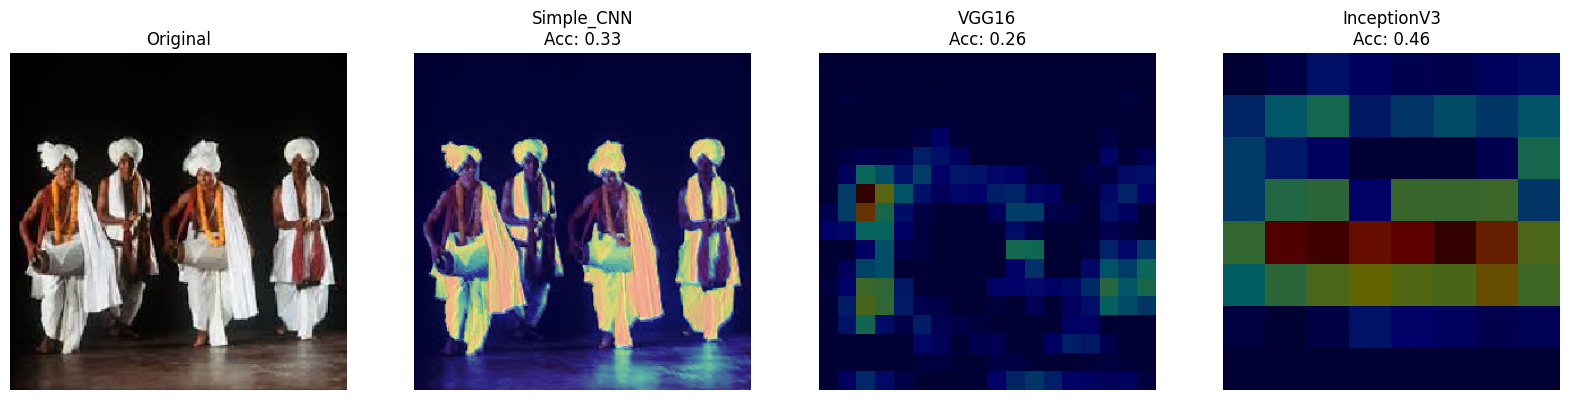

In [4]:
# ==========================================
# 4. MODEL COMPARISON LOOP
# ==========================================
models_to_test = [
    {"name": "Simple_CNN", "layer": "target_conv_cnn", "preprocess": lambda x: x/255.0},
    {"name": "VGG16", "layer": "block5_conv3", "preprocess": vgg16.preprocess_input},
    {"name": "InceptionV3", "layer": "mixed10", "preprocess": inception_v3.preprocess_input}
]

sample_path = os.path.join(image_dir, df.iloc[0]['Image'])
img_raw = load_img(sample_path, target_size=(299, 299))
img_numpy = img_to_array(img_raw)

results = []
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(img_raw); axes[0].set_title("Original"); axes[0].axis('off')

for i, m_info in enumerate(models_to_test):
    print(f"\n--- Processing {m_info['name']} ---")

    # Model-Specific Preprocessing
    datagen = ImageDataGenerator(preprocessing_function=m_info['preprocess'], validation_split=0.2)
    train_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='training', seed=SEED, verbose=0)
    val_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='validation', shuffle=False, verbose=0)

    # BUILDING USING FUNCTIONAL API TO PREVENT ATTRIBUTE ERRORS
    inputs = Input(shape=(299, 299, 3))
    if m_info['name'] == "Simple_CNN":
        x = Conv2D(32, (3,3), activation='relu', name="target_conv_cnn")(inputs)
        x = MaxPooling2D(2,2)(x)
        x = Flatten()(x)
        x = Dense(128, activation='relu')(x)
        outputs = Dense(8, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=outputs)
    else:
        base_net = VGG16 if m_info['name'] == "VGG16" else InceptionV3
        base = base_net(weights='imagenet', include_top=False, input_tensor=inputs)
        base.trainable = False
        x = GlobalAveragePooling2D()(base.output)
        outputs = Dense(8, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_gen, validation_data=val_gen, epochs=3, verbose=1)

    # Explainability Result
    proc_img = m_info['preprocess'](np.copy(img_numpy))
    heatmap = get_gradcam_heatmap(np.expand_dims(proc_img, axis=0), model, m_info['layer'])

    axes[i+1].imshow(img_raw)
    axes[i+1].imshow(heatmap, cmap='jet', alpha=0.4)
    axes[i+1].set_title(f"{m_info['name']}\nAcc: {model.evaluate(val_gen, verbose=0)[1]:.2f}")
    axes[i+1].axis('off')

plt.show()

## Phase 2: Final Production Model (25 Epochs)
> *Goal: Achieve maximum accuracy and generate publication-ready heatmaps.*

Finalizing Production for InceptionV3...
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.1373 - loss: 2.2593 - val_accuracy: 0.3056 - val_loss: 1.8561
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.3653 - loss: 1.8179 - val_accuracy: 0.3889 - val_loss: 1.6754
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step - accuracy: 0.5737 - loss: 1.4123 - val_accuracy: 0.4861 - val_loss: 1.5415
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step - accuracy: 0.7268 - loss: 1.2469 - val_accuracy: 0.5694 - val_loss: 1.3982
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.7159 - loss: 1.1116 - val_accuracy: 0.4861 - val_loss: 1.4560
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.7675 - loss: 0.9618 - val_accuracy: 0.5556 - val_loss: 1.3120
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.7938 - loss: 0.8735 - val_accuracy: 0.5278 - val_loss: 1.3390
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.8326 - loss: 0.8289 - val_accuracy: 0.54

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_340']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


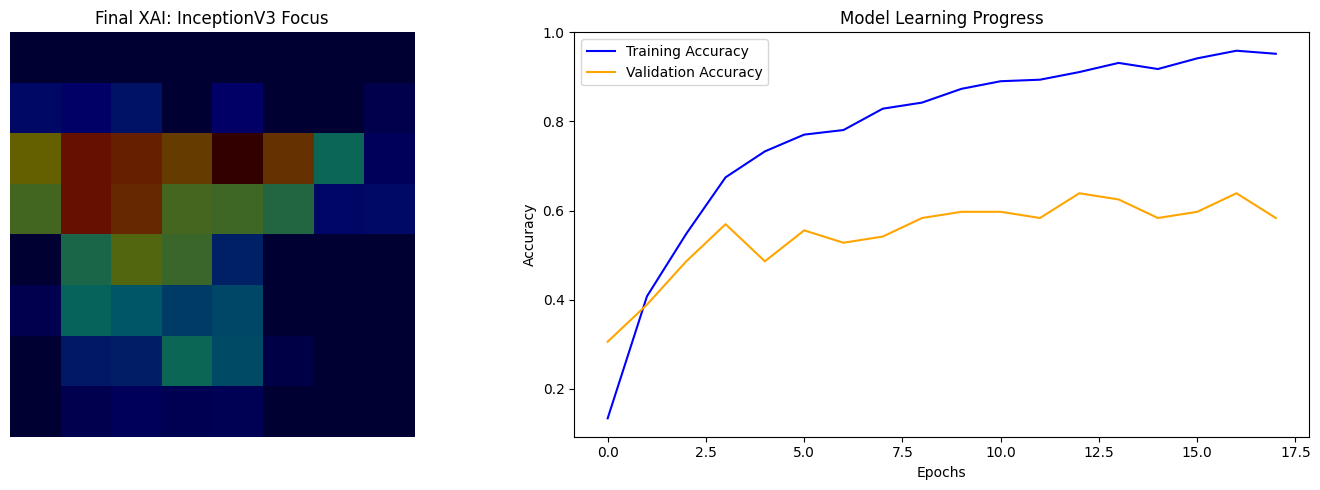

In [5]:
# ==========================================
# PHASE 2: FINAL PRODUCTION RUN (INCEPTION V3)
# ==========================================
# We focus on InceptionV3 because it won the Phase 1 comparison.

SEED = 32
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

m_info = {
    "name": "InceptionV3",
    "layer": "mixed10",
    "preprocess": inception_v3.preprocess_input
}

print(f"Finalizing Production for {m_info['name']}...")

# 1. Setup Data
datagen = ImageDataGenerator(preprocessing_function=m_info['preprocess'], validation_split=0.2)
train_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='training', seed=SEED)
val_gen = datagen.flow_from_dataframe(df, directory=image_dir, x_col='Image', y_col='target', target_size=(299,299), subset='validation', shuffle=False)

# 2. Build Final Model (Functional API)
inputs = Input(shape=(299, 299, 3))
base = InceptionV3(weights='imagenet', include_top=False, input_tensor=inputs)
base.trainable = False
x = GlobalAveragePooling2D()(base.output)
outputs = Dense(8, activation='softmax')(x)
final_model = Model(inputs=inputs, outputs=outputs)

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train with Early Stopping (to pick the best epoch)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_dance_model.keras", save_best_only=True)
]

# Note: Since you already ran it, this will run again.
# If you want to skip training, just ensure 'final_model' is the one you just trained.
history = final_model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)

# 4. FIXING THE NameError: Define img_array properly
# We take a sample image and process it specifically for InceptionV3
sample_path = os.path.join(image_dir, df.iloc[0]['Image'])
img_raw = load_img(sample_path, target_size=(299, 299))
img_numpy = img_to_array(img_raw)

# This creates the 'img_array' the model expects:
img_preprocessed = m_info['preprocess'](np.copy(img_numpy))
img_array = np.expand_dims(img_preprocessed, axis=0)

# 5. Generate and Display the Final "Story"
heatmap = get_gradcam_heatmap(img_array, final_model, m_info['layer'])

# Plotting Results for Publication
plt.figure(figsize=(15, 5))

# Plot A: The Explainability
plt.subplot(1, 2, 1)
plt.imshow(img_raw)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.title(f"Final XAI: {m_info['name']} Focus")
plt.axis('off')

# Plot B: The Training Performance (Learning Curves)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title("Model Learning Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.savefig("final_publication_results.png")
plt.show()

Finalizing Production for InceptionV3...
Found 292 validated image filenames belonging to 8 classes.
Found 72 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 0.1377 - loss: 2.2641
Epoch 1: val_accuracy improved from -inf to 0.30556, saving model to best_dance_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.1373 - loss: 2.2593 - val_accuracy: 0.3056 - val_loss: 1.8561 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3611 - loss: 1.8228
Epoch 2: val_accuracy improved from 0.30556 to 0.38889, saving model to best_dance_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.3653 - loss: 1.8179 - val_accuracy: 0.3889 - val_loss: 1.6754 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5763 - loss: 1.4094
Epoch 3: val_accuracy improved from 0.38889 to 0.48611, saving model to best_dance_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.5737 - loss: 1.4123 - val_accuracy: 0.4861 - val_loss: 1.5415 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_653']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


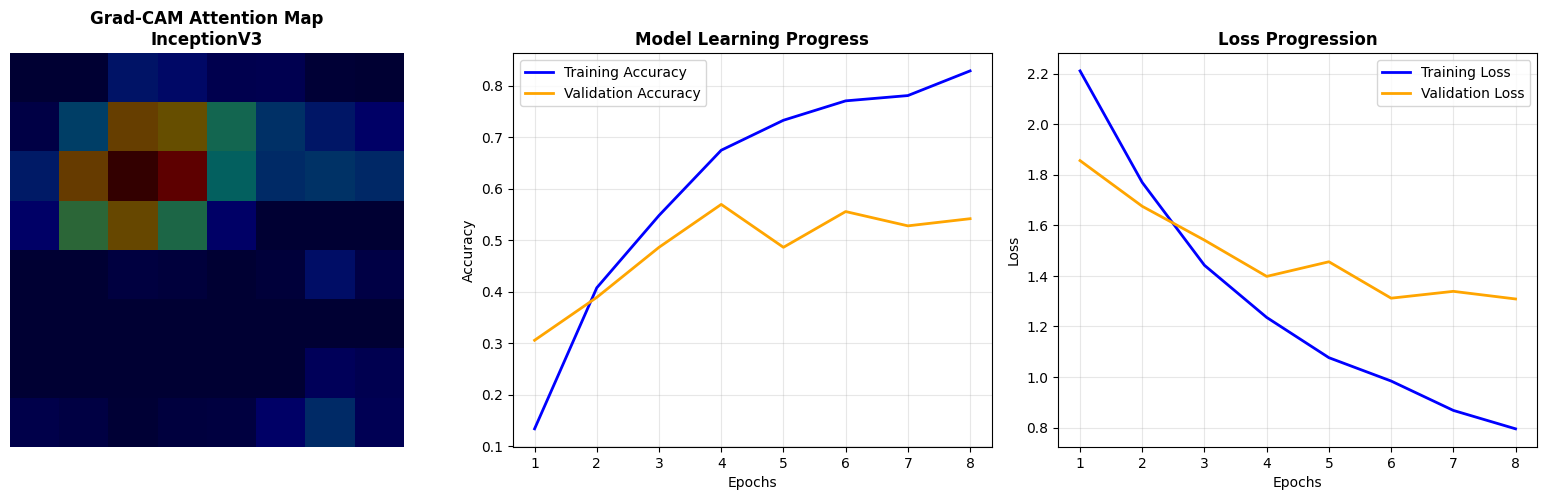


TRAINING SUMMARY
Total Epochs Trained: 8
Final Training Accuracy: 0.8288
Final Validation Accuracy: 0.5417
Best Validation Accuracy: 0.5694
Overfitting Gap: 0.2871


In [6]:
# ==========================================
# IMPROVED PHASE 2: PRODUCTION RUN WITH EFFECTIVE EARLY STOPPING
# ==========================================

SEED = 32
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

m_info = {
    "name": "InceptionV3",
    "layer": "mixed10",
    "preprocess": inception_v3.preprocess_input
}

print(f"Finalizing Production for {m_info['name']}...")

# 1. Setup Data
datagen = ImageDataGenerator(
    preprocessing_function=m_info['preprocess'],
    validation_split=0.2
)
train_gen = datagen.flow_from_dataframe(
    df, directory=image_dir, x_col='Image', y_col='target',
    target_size=(299,299), subset='training', seed=SEED
)
val_gen = datagen.flow_from_dataframe(
    df, directory=image_dir, x_col='Image', y_col='target',
    target_size=(299,299), subset='validation', shuffle=False
)

# 2. Build Final Model (Functional API)
inputs = Input(shape=(299, 299, 3))
base = InceptionV3(weights='imagenet', include_top=False, input_tensor=inputs)
base.trainable = False
x = GlobalAveragePooling2D()(base.output)
outputs = Dense(8, activation='softmax')(x)
final_model = Model(inputs=inputs, outputs=outputs)

final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. IMPROVED CALLBACKS - More Aggressive Early Stopping
callbacks = [
    # Early stopping based on validation accuracy
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=4,                    # Stop if no improvement for 4 epochs
        mode='max',                    # We want to maximize accuracy
        restore_best_weights=True,     # Restore best weights when stopping
        verbose=1
    ),

    # Save best model based on validation accuracy
    tf.keras.callbacks.ModelCheckpoint(
        "best_dance_model.keras",
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    ),

    # Reduce learning rate when validation loss plateaus
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,                    # Reduce LR by half
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# 4. Train with proper callbacks
history = final_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,                         # Set high, let early stopping decide
    callbacks=callbacks,
    verbose=1
)

print(f"\nTraining completed at epoch {len(history.history['loss'])}")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

# 5. Load the best saved model (optional verification)
# best_model = tf.keras.models.load_model("best_dance_model.keras")

# 6. Prepare image for Grad-CAM
sample_path = os.path.join(image_dir, df.iloc[0]['Image'])
img_raw = load_img(sample_path, target_size=(299, 299))
img_numpy = img_to_array(img_raw)
img_preprocessed = m_info['preprocess'](np.copy(img_numpy))
img_array = np.expand_dims(img_preprocessed, axis=0)

# 7. Generate Grad-CAM
heatmap = get_gradcam_heatmap(img_array, final_model, m_info['layer'])

# 8. Create Publication-Quality Visualization
fig = plt.figure(figsize=(16, 5))

# Plot A: Grad-CAM Heatmap
ax1 = plt.subplot(1, 3, 1)
ax1.imshow(img_raw)
ax1.imshow(heatmap, cmap='jet', alpha=0.4)
ax1.set_title(f"Grad-CAM Attention Map\n{m_info['name']}", fontsize=12, fontweight='bold')
ax1.axis('off')

# Plot B: Training Curves
ax2 = plt.subplot(1, 3, 2)
epochs = range(1, len(history.history['accuracy']) + 1)
ax2.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
ax2.plot(epochs, history.history['val_accuracy'], 'orange', label='Validation Accuracy', linewidth=2)
ax2.set_title("Model Learning Progress", fontsize=12, fontweight='bold')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot C: Loss Curves
ax3 = plt.subplot(1, 3, 3)
ax3.plot(epochs, history.history['loss'], 'b-', label='Training Loss', linewidth=2)
ax3.plot(epochs, history.history['val_loss'], 'orange', label='Validation Loss', linewidth=2)
ax3.set_title("Loss Progression", fontsize=12, fontweight='bold')
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("final_publication_results.png", dpi=300, bbox_inches='tight')
plt.show()

# 9. Print Final Summary
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs Trained: {len(history.history['loss'])}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Overfitting Gap: {history.history['accuracy'][-1] - history.history['val_accuracy'][-1]:.4f}")
print("="*60)